# Hannah Padgette - CHEN 5838 HW2
Rename this file and place your code in this notebook.

**Note: If a cell begins with HW: do not change it and leave the markdown there so I can expect a basic level of  organization that is common to all HW. This also clearly delineates the sections for me.**

#### HW: Preamble: load all needed packages in the cell below.

In [1]:
import numpy as np
import math

### HW: Part 1: Functional programming


**HW 1-1:** The “divide and average” method is a numerical method for computing square roots that goes back to the ancient Babylonians. The method takes as inputs the number for which the square root is wanted (call it $a$) and a guess for the square root, $x_i$. 

$\begin{eqnarray}x_{i+1} = \frac{x_i + \frac{a}{x_i}}{2}\end{eqnarray}$

This method then gives a new, better guess for the square root. The method can be repeated until the answer converges to the square root.

a) Write a function that takes in a value for $a$ and a tolerance $\delta$, and returns a value for the square root within $\delta$ of the true answer.

In [2]:
def sqroot(a, delta, initial_guess):
    """ This calculates the square root of a number passed as the parameter using the divide and average numerical method.

        Args:
            a:             number to calculate the square root of
            delta:         tolerance (the function will return a square root value within this amount of the true answer)
            initial_guess: initial guess for the square root of a

        Returns:
            float containing the solution
    
    """
    
    upper_bound = np.sqrt(a) + delta
    lower_bound = np.sqrt(a) - delta

    prev_num = 0
    next_num = (initial_guess + a / initial_guess) / 2


    if initial_guess >= lower_bound and initial_guess <= upper_bound: print("INITIAL GUESS W/IN TOLERANCE")
    elif next_num >= lower_bound and next_num <= upper_bound: print("FIRST CALCULATION W/IN TOLERANCE")
    else: prev_num = next_num

    
    while next_num <= lower_bound or next_num >= upper_bound:
        # print(next_num)
        next_num = (prev_num + a / prev_num) / 2
        # print(next_num)
        if next_num >= lower_bound and next_num <= upper_bound: break
        prev_num = next_num
        # print(prev_num)

    return next_num


b) Call your function to compute the square root of 9, 67, and 2023 to within one part in $10^6$. Check with the square root function in Python `math` module that your answers are right.

In [3]:
initial_guess = 0.5
delta = 1/(10**6)
test1 = 9
test2 = 67
test3 = 2023

In [4]:
print("Using an initial guess of " + str(initial_guess) + ", the calculated value for the square root of", test1, "within", delta, "of the true answer is " + str(sqroot(test1,delta,initial_guess)) + ".") 
print("The true square root of", test1, "is " + str(math.sqrt(test1)) + ".")

print("Using an initial guess of " + str(initial_guess) + ", the calculated value for the square root of", test2, "within", delta, "of the true answer is " + str(sqroot(test2,delta,initial_guess)) + ".") 
print("The true square root of", test2, "is " + str(math.sqrt(test2)) + ".")

print("Using an initial guess of " + str(initial_guess) + ", the calculated value for the square root of", test3, "within", delta, "of the true answer is " + str(sqroot(test3,delta,initial_guess)) + ".") 
print("The true square root of", test3, "is " + str(math.sqrt(test3)) + ".")

Using an initial guess of 0.5, the calculated value for the square root of 9 within 1e-06 of the true answer is 3.0000000026665945.
The true square root of 9 is 3.0.
Using an initial guess of 0.5, the calculated value for the square root of 67 within 1e-06 of the true answer is 8.18535277187286.
The true square root of 67 is 8.18535277187245.
Using an initial guess of 0.5, the calculated value for the square root of 2023 within 1e-06 of the true answer is 44.97777229974264.
The true square root of 2023 is 44.97777228809804.


c) Note that I did not specify the value of $x_i$ that you start with. What are the requirements for the starting value so that we eventually converge to the correct square root? Play around and report your observations.

In [5]:
def sqroot2(a, delta, initial_guess):
    """ This calculates the square root of a number passed as the parameter using the divide and average numerical method.

        Args:
            a:             number to calculate the square root of
            delta:         tolerance (the function will return a square root value within this amount of the true answer)
            initial_guess: initial guess for the square root of a

        Returns:
            float containing the solution
    
    """

    upper_bound = np.sqrt(a) + delta
    lower_bound = np.sqrt(a) - delta

    prev_num = 0
    next_num = (initial_guess + a / initial_guess) / 2

    if initial_guess >= lower_bound and initial_guess <= upper_bound: print("INITIAL GUESS W/IN TOLERANCE")
    elif next_num >= lower_bound and next_num <= upper_bound: print("FIRST CALCULATION W/IN TOLERANCE")
    else: prev_num = next_num
   
    while next_num <= lower_bound or next_num >= upper_bound:
        next_num = (prev_num + a / prev_num) / 2
        if next_num >= lower_bound and next_num <= upper_bound: break
        prev_num = next_num
        
    print("Using an initial guess of " + str(initial_guess) + ", the calculated value for the square root of " + str(a) + " within " + str(delta) + " of the true answer is " + str(next_num) + ".")
    print("The percent error in the calculated square root of " + str(a) + " is " + str(abs((next_num - np.sqrt(a)) / np.sqrt(a))*100))

In [6]:
# sqroot2(4, 0.01, -10**10) # this wouldn't finish running and made computer sound like it was catapulting itself into space

# sqroot2(100, 10**(-10), 0) # can't use an initial guess of 0

sqroot2(200, 10, 10**(-5))
print(np.sqrt(200))

sqroot2(200, 10**(-5), 10**(-5))

Using an initial guess of 1e-05, the calculated value for the square root of 200 within 10 of the true answer is 22.446995085129554.
The percent error in the calculated square root of 200 is 58.72422441956211
14.142135623730951
Using an initial guess of 1e-05, the calculated value for the square root of 200 within 1e-05 of the true answer is 14.1421356251345.
The percent error in the calculated square root of 200 is 9.924592113559151e-09


- If the initial guess is too close to the real answer then the function I wrote will tell the user that the initial guess is within the specified tolerance (delta). Other than that, there don't seem to be any huge restrictions on the initial guess. If it's an outrageously large number (e.g., -10**10 as shown above), my computer won't converge to a solution and will keep running and heating up. Other than that, the only "reasonable" number which wouldn't return a solution is 0 b/c the divide and average method would require division by 0 which is mathematically unrealistic and Python would throw an error for. 

d) Describe how the error decreases as a function of how close to the true solution you are.

- As long as you have a somewhat reasonable initial guess (e.g., not 0 or something like -10**10) you can get a calculated answer with a reasonable small error. The biggest thing that affects the error in the calculation is the value of delta. If delta is sufficiently small, you can get an error close to 0% but if delta is large (e.g., 10) then your answer can get up say 68% (see code cell(s) above in part 3b)

#### HW Part 2: Generalization

Write a function that produces the prime factorization of an input integer.  The function should return a dictionary with the prime factor as a key, and the power of that prime factor as the value. The dictionary should only include values with at least power 1, i.e. the results dictionary returned for input=60 would be: 

``results = {2:2,3:1,5:1}``

If you did the full prime factorization in HW1, congratulations, just turn it into a function. Demonstrate that the program does work on several problems that show off the functionality (i.e. prime numbers, powers of a single prime, multiples of only primes to one power, etc). 

In [7]:
def prime_factor(n):
    """ This produces the prime factorization of an input integer.

        Args:
            n: number for which prime factorization will be produced.

        Returns:
            dictionary containing the prime factors as keys and the power of that prime factor as the value
    
    """
    results = dict()
    i = 2

    while n > 1:
        count = 0
        if n % 1 == 0:
            while n % i == 0:
                count += 1 
                n = n / i
        if count >= 1:
            results[i] = count
        i += 1
        print(n)
        print(i)
    return results

print(prime_factor(60))

15.0
3
5.0
4
5.0
5
1.0
6
{2: 2, 3: 1, 5: 1}


(Probably somewhat confusing) thought process I used in building this function:
- Note - using 60 as an example number
- Want to divide 60 by 2 (starting value of i). If 60 % 2 == 0 (n % i == 0), want to enter a part of the code where it counts how many times you can do that with the divisor (e.g., count how many times you can divide 60 by 2 before you would get a modulus of 1, not zero).

    ```i = 2```\
    ```if n % i == 0:```

- To do do this, can implement a while loop within the for loop. The while loop while work by saying while 60 % 2 == 0 (n % i ==0), then increase the count by 1 and overwrite 60 to now be 30 (i.e., n = n / 2).

    ```count = 0```\
    ```while n % i == 0:```\
        ```count += 1```\
        ```n = n / i```

- Once you can no longer divide by 2 (i), then store 2 (i) as a key and it's count (as long as it's > 1) as the corresponding value.

    ```results = dict()```\
    ```if count >= 1```\
    ```results[i] = count```

- Then, increase the number you're dividing by (i) by 1. In the case of 60, you would have 2: 2 in results and now i would be 3 and n would be 15.

    ```i += 1```

- Now, 15 (n) is divided by (i) following the same logic as above.
- This loop continues on, increasing i by 1 on each round until n = 1. In the case of 60, this last round would look like: i = 5, n = 5. Since n % i == 0, 60 is divisible by 5 at least once (count for the '5' key is 1) and now n is equal to 1 (since n = n/1 is in the loop).
    - Nest all the previously mentioned code inside a loop: ```while n > 1```
- Now we would exit the loop since n = 1.0 which is not > 1.

*A note on the use of ChatGPT in this problem*
- I was struggling with starting to think about how I could code this problem. I knew how to find all the factors of a number (since I had already coded that in HW1) but I wasn't sure how to translate that into prime factorization. As a result, I posed the following question to ChatGPT: How would I start to think through writing a piece of Python code to find all the prime factors of an integer? Don't write the code for me, I'm just curious what would be a good way to start thinking about the problem.
- This is what ChatGPT came back to me with:
    - Certainly! Finding all the prime factors of an integer is a common mathematical problem that can be approached systematically. Here's a step-by-step guide on how to start thinking about solving this problem in Python:
      1. **Understand the Problem**: Make sure you have a clear understanding of what prime factors are. Prime factors are the prime numbers that multiply together to give the original integer.
      2. **Input**: Determine how you will take the input integer for which you want to find the prime factors. You can use user input, function arguments, or any other method depending on your specific requirements.
      3. **Edge Cases**: Consider edge cases and handle them appropriately. For example, what should happen if the input is a negative number, zero, or 1?
      4. **Initialize Data Structures**: You'll need some data structures to store the prime factors as you find them. Consider using a list or set to store the prime factors, as they should be unique.
      5. **Prime Factorization Algorithm**: Think about the algorithm you'll use to find the prime factors. One common approach is trial division, where you divide the input number by progressively larger prime numbers until it can't be divided any further. Another more efficient approach is to use the Sieve of Eratosthenes to generate prime numbers up to a certain limit and then use those primes for factorization.
      6. **Loop and Divide**: Write a loop that iterates through potential divisors (either prime numbers or all integers) and checks if the input number is divisible by that divisor. If it is divisible, add the divisor to your list of prime factors, and divide the input number by that divisor. Repeat this process until the input number becomes 1.
      7. **Optimizations**: You can optimize your code by stopping the loop once the input number becomes 1 because any further divisions won't yield prime factors.
      8. **Output**: Determine how you want to present the prime factors. You can return them as a list, print them, or use any other suitable format.
      9. **Testing**: Test your code with various inputs, including both small and large integers, to ensure it works correctly.
      10. **Efficiency**: Consider the efficiency of your code, especially if you're dealing with very large integers. You might want to implement more efficient algorithms or optimizations to speed up the factorization process.
    - Remember that breaking down the problem into smaller steps and understanding the underlying math concepts will help you think through and solve the problem effectively in Python or any other programming language.
- Although not all of this was useful (I knew what prime factors were, I knew I was writing a function and that was my input, I knew I would store prime factors as a dictionary, not a list or set, etc.), I used pieces of this advice to start thinking through the problem as I outlined above.
- For instance, the notes on trial division and using a loop and divide approach until the input number becomes 1 became the basis of my approach to this problem. 

#### HW Part 3: Exploration 
Continue to play around Python test out a range of functionality that wasn’t covered in class. Each hour your spend learning Python tools now will save you about 30 min per week in trying to get things done later!

Write in a Markdown cell a couple of paragraphs about what you did, and give some examples of code cells below the cool things you found.

- For this exploration part of the assignment, I decided to continue last week's exploration of the [seaborn Python package](https://seaborn.pydata.org/tutorial.html).
- Last week, I completed the first few parts of seaborn's "An intorduction to seaborn" user tutorial. I ended with the "Plots for categorical data" section so I will pick up there and continue through, finishing this portion of the tutorial.
- Assuming that future homework assignments will also contain exploration components, I hope to go through more of the seaborn tutorial library, focusing on the follow tutorials: visualizing statistical relationships, statistical estimation and error bars, controlling figure aesthetics, and choosing color palettes.
- Later on in the semester, I think it would also be useful to try using seaborn to graph some data that I generate as part of my independent study.

In [8]:
import seaborn as sns

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


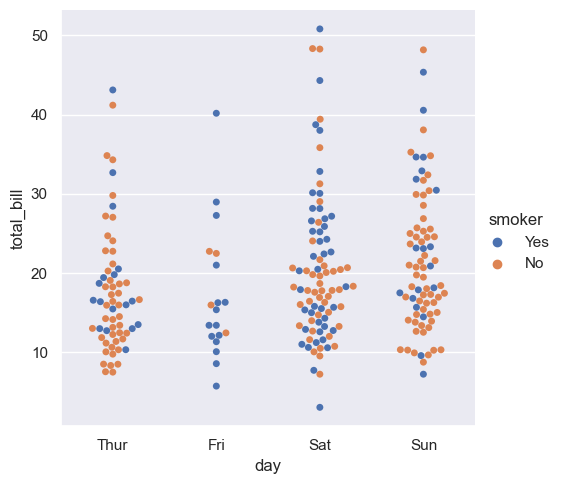

In [9]:
tips = sns.load_dataset("tips")
sns.set_theme()

# graph the tips data as a swarm plot, a scatter plot which adjusts positions of points along the vategorical axis so that there's no overlap b/w data points
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


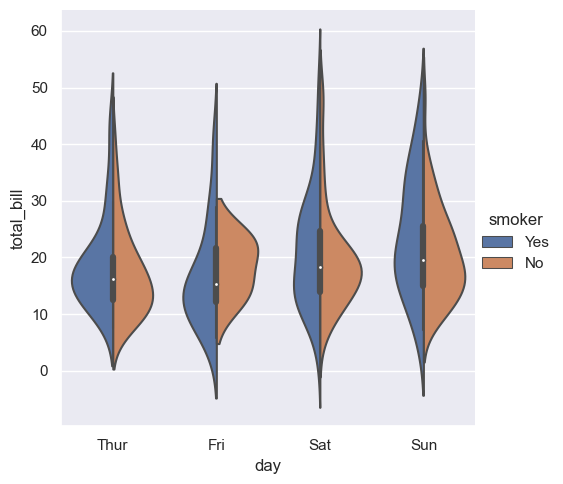

In [10]:
# use kernal density estimation to represent the underlying distribution which the points are sampled from
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


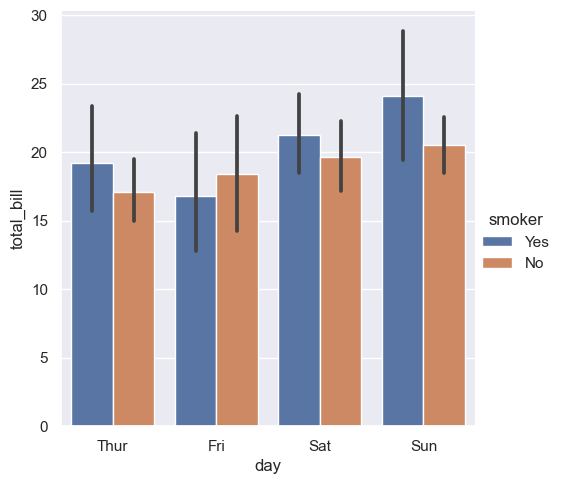

In [11]:
# show only the mean value and its confidence interval
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

Seaborn also has functions which combine multiple kinds of plots to give visual summaries of datasets which are informative and visually pleasing. The jointplot() function, for example, can plot the joint distribution b/w two variables as well as the marginal distribution.

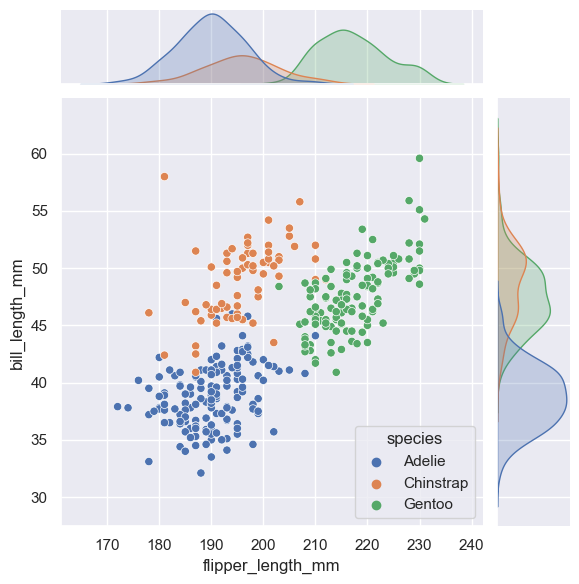

In [12]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


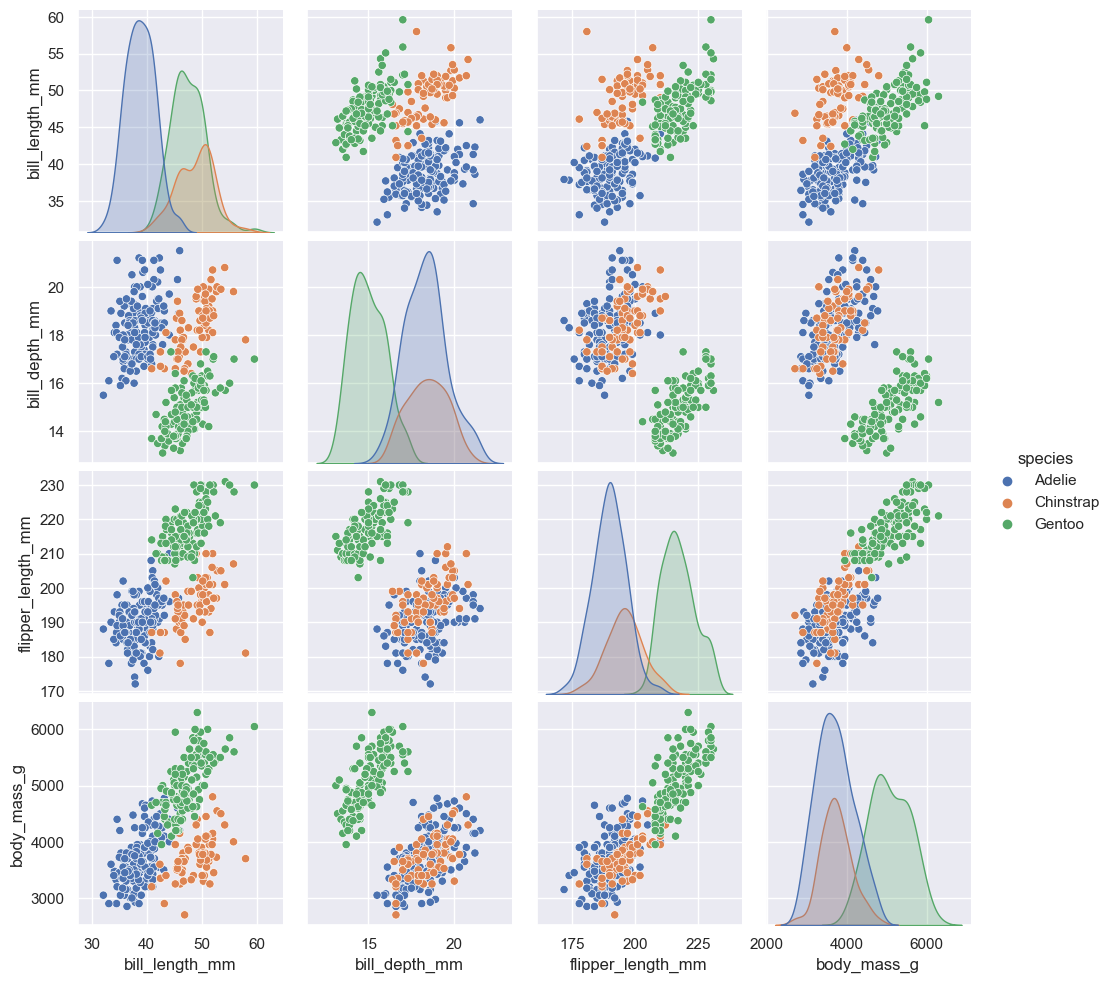

In [13]:
# the pairplot() function shows joint and marginal distributions for all pairwise relationships and for each variable
# this approach gives the user a broader view of the data
sns.pairplot(data=penguins, hue="species")

It is also possible to combine axes-level plotting functions with objects that manage figure layout. Tools which combine these link the structure of datasets to a grid of axes and enable the generation of complex figues with minimal lines of code.

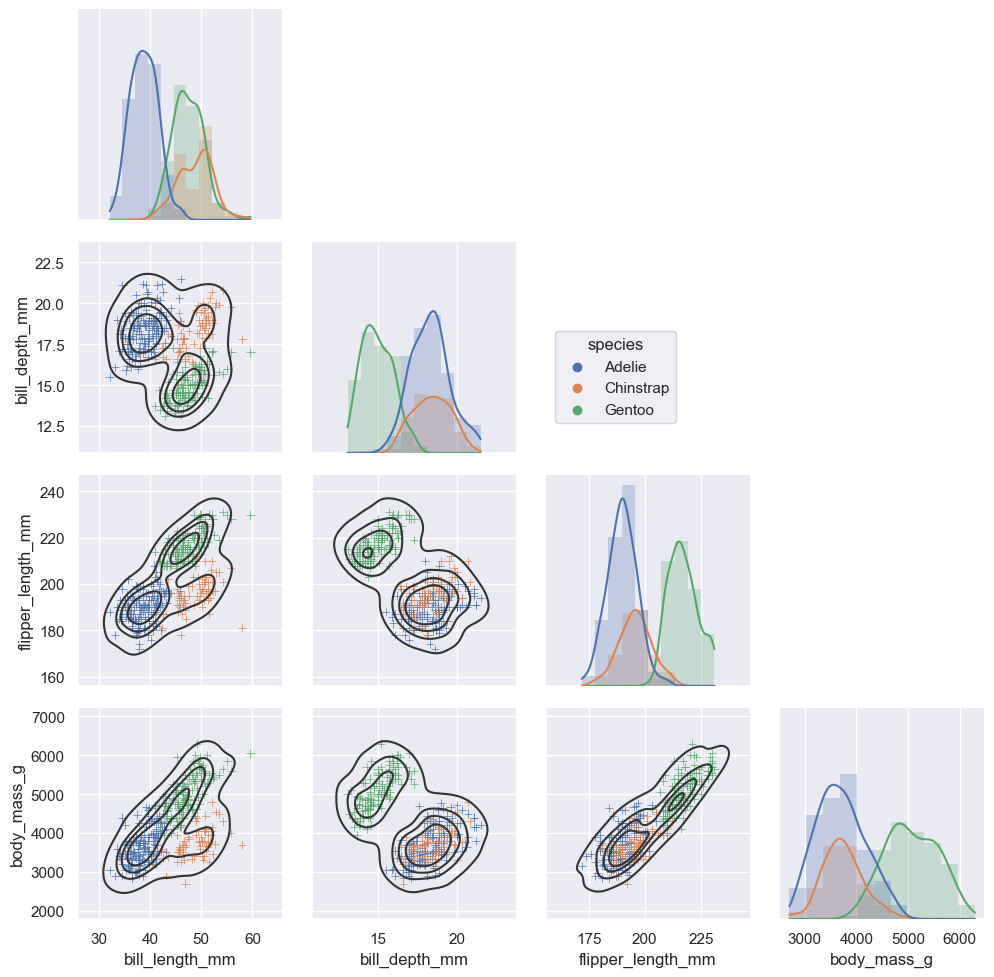

In [14]:
# create the grid / layout of the 10 plots
g = sns.PairGrid(penguins, hue="species", corner=True)

# add contour map outlines
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")

# add dots (species data) to contour plots
g.map_lower(sns.scatterplot, marker="+")

# addd distribution data to the plots on the diagonal
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)

# add a legend
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

Seaborn uses default values for many visualization parameters based on characteristics of the data. For instance, the above plots use the default hue so all data is plotted in green / blue / orange. This is because that data is categorical. If a dataset is continuous, some functions will switch the hue to also be continuous and will plot the data in a continuous gradient hue as follows.

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


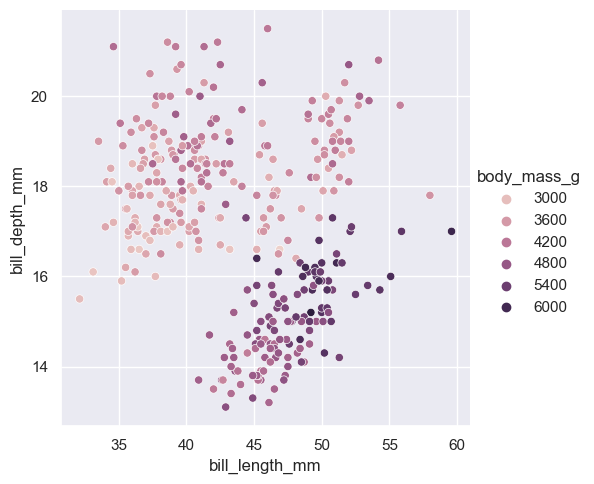

In [15]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g")

Seaborn allows for detailed customization, which may be required when polishing figures for publication. Built in themes can be applied to all figures but in addition, some functions have standardized parameters which can be tuned to modify the appearance of plots. For instance, using just a few extra lines of code the above plot can instead be plotted as follows:

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


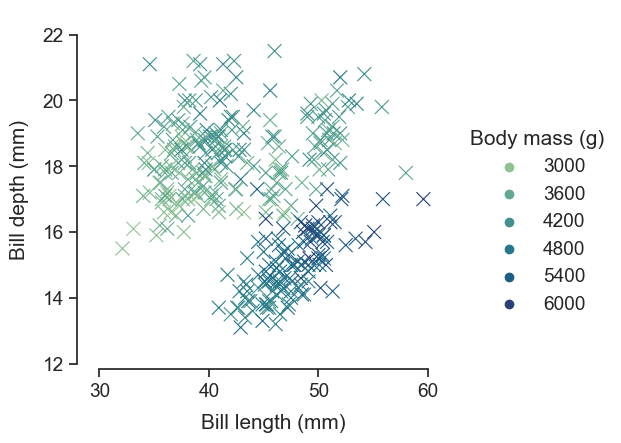

In [16]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g", palette="crest", marker="x", s=100,)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)

An interesting note from seaborn on its/their relationship to matplotlib: 
> Matplotlib has a comprehensive and powerful API; just about any attribute of the figure can be changed to your liking. A combination of seaborn’s high-level interface and matplotlib’s deep customizability will allow you both to quickly explore your data and to create graphics that can be tailored into a publication quality final product.



At this point I finished their basic user guide and tutorial. Hopefully I can explore this powerful data visualization and analysis software more in the upcoming weeks!

Some additional seaborn resources I came across during my exploration this time around:
- [API reference](https://seaborn.pydata.org/api.html)
- [Example gallery](https://seaborn.pydata.org/examples/index.html
- A [GitHub repository](https://github.com/wagnerlabpapers/Waskom_PNAS_2017) with example python scripts to generation publication worthy figures and statistical analysis.